<a href="https://colab.research.google.com/github/nkrama-99/Masks-Unmasked/blob/main/SampleCodeForFaceDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#One possible way for face detection-research
!pip install facenet-pytorch



     |████████████████████████████████| 1.9MB 2.8MB/s 


In [ ]:
!pip install torch-mtcnn  #Another algo for face detection

In [ ]:
from torch_mtcnn import detect_faces
from PIL import Image

image = Image.open('/content/drive/My Drive/APS 360/Image1.jpg')
bounding_boxes, landmarks = detect_faces(image)

Downloading: "https://github.com/khrlimam/mtcnn-pytorch/releases/download/0.0.1/pnet-6b6ef92b.pth" to /root/.cache/torch/hub/checkpoints/pnet-6b6ef92b.pth


Downloading: "https://github.com/khrlimam/mtcnn-pytorch/releases/download/0.0.1/rnet-b13c48bc.pth" to /root/.cache/torch/hub/checkpoints/rnet-b13c48bc.pth


Downloading: "https://github.com/khrlimam/mtcnn-pytorch/releases/download/0.0.1/onet-60cc8dd5.pth" to /root/.cache/torch/hub/checkpoints/onet-60cc8dd5.pth


In [ ]:
! pip install cvlib

     |████████████████████████████████| 10.1MB 4.2MB/s 
  Created wheel for cvlib: filename=cvlib-0.2.5-cp36-none-any.whl size=10044206 sha256=2742aad135679bc7c28bc5a58ce0798e8c407aac40495968b6532b33a6d92ba2
  Stored in directory: /root/.cache/pip/wheels/6a/cb/43/ba188c823836640d8f22ee1f6ff792a0c83a8b66eabf52b219
  Created wheel for progressbar: filename=progressbar-2.5-cp36-none-any.whl size=12076 sha256=969a633d86eedc76c28c71d8a127d41d3d06d3ce6ebc4be031bf0065f4f647c5
  Stored in directory: /root/.cache/pip/wheels/c0/e9/6b/ea01090205e285175842339aa3b491adeb4015206cda272ff0
Successfully built cvlib progressbar


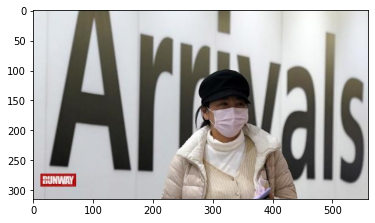

In [ ]:
#THIS IS FACE DETECTION
 
#bounding boxes is the boxes identifyinfg the face in the picture
import cv2
import matplotlib.pyplot as plt
import cvlib
xmin=int(bounding_boxes[0][0])
ymin=int(bounding_boxes[0][1])
xmax=int(bounding_boxes[0][2])
ymax=int(bounding_boxes[0][3])


rects = [[(xmin,ymin), (xmax, ymax)]]
img = cv2.imread('/content/drive/My Drive/APS 360/Image1.jpg')
# Need to convert from BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB);

plt.imshow(img)

#WE WILL BE USING THIS!!!

# https://machinelearningmastery.com/how-to-perform-face-detection-with-classical-and-deep-learning-methods-in-python-with-keras/


# https://www.pyimagesearch.com/2020/04/13/opencv-age-detection-with-deep-learning/

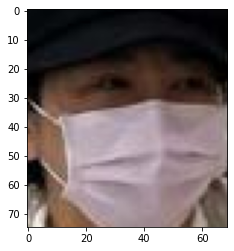

In [ ]:
#NEXT STEP IS TO CROP

crop_rectangle= img[ymin:ymax, xmin:xmax]
plt.imshow(crop_rectangle )


In [ ]:
#What to do in case there are multiple boxes???
image = Image.open('/content/drive/My Drive/APS 360/MultipleFaces.jpg')
bounding_boxes, landmarks = detect_faces(image)

22


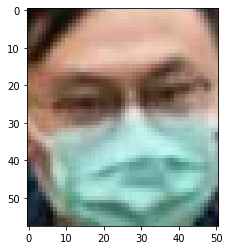

In [ ]:
#NEXT STEP IS TO CROP

xmin=int(bounding_boxes[3][0])
ymin=int(bounding_boxes[3][1])
xmax=int(bounding_boxes[3][2])
ymax=int(bounding_boxes[3][3])


rects = [[(xmin,ymin), (xmax, ymax)]]


img_new = cv2.imread('/content/drive/My Drive/APS 360/MultipleFaces.jpg')
img_new = cv2.cvtColor(img_new, cv2.COLOR_BGR2RGB);

crop_rectangle= img_new[ymin:ymax, xmin:xmax]
plt.imshow(crop_rectangle )
print(len(bounding_boxes))

The performance of above methods is not satisfactory-some faces not detected correctly! So we use another method

In [ ]:
!pip3 install face_recognition


     |████████████████████████████████| 100.2MB 105kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=7ff1151101f7fad3796de949fb4997a59598eb61cea98546a2a6f0df7eeb37da
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [ ]:
import face_recognition
image_another_way = face_recognition.load_image_file("/content/drive/My Drive/APS 360/MultipleFaces.jpg")
face_locations = face_recognition.face_locations(image_another_way)

8
(122, 722, 184, 660)


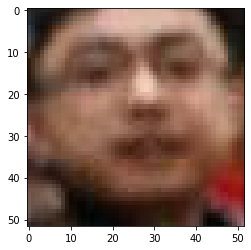

In [ ]:
import matplotlib.pyplot as plt
import cv2

print(len(face_locations))
print(face_locations[0])
img_new = cv2.imread('/content/drive/My Drive/APS 360/sample2.jpg')
img_new = cv2.cvtColor(img_new, cv2.COLOR_BGR2RGB);

top, right, bottom, left = face_locations[1]  #bounding boxes
face_image = image_another_way[top:bottom, left:right]  #Cropping images
plt.imshow(face_image)

#THIS IS THE BEST-WE WILL USE THIS-
